In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.regularizers import l1, l2

In [2]:
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], enable=True)

In [3]:
def split(a, b, c, seed):
    n = len(a)
    index = np.arange(n)
    d = int(c * n)
    np.random.seed(seed)
    np.random.shuffle(index)
    return a[index[:d]], b[index[:d]], a[index[d:]], b[index[d:]]

In [4]:
df = pd.read_csv('train.csv')
y = []
for i in df['label'].values:
    q = [0 for _ in range(10)]
    q[i] = q[i] + 1
    y.append(q)
y = np.array(y)
x = df.drop(columns=['label']).values
x = x.reshape(x.shape[0], 28, 28, 1)
y = y.reshape(-1, 10)
x_train, y_train, x_test, y_test = split(x, y, 0.8, 42)

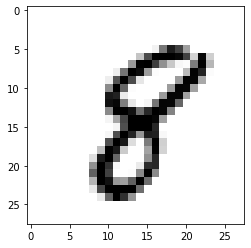

[0 0 0 0 0 0 0 0 1 0]


In [5]:
plt.imshow(x_train[4], cmap = 'binary',)
plt.show()
print(y_train[4])

In [6]:
def build_model(shape):
    inputs = Input(shape=(shape[1], shape[2], shape[3]))
    x = Conv2D(filters=64, kernel_size=(3,3), 
               padding='same', activation='relu', kernel_initializer='he_uniform')(inputs)
    x = MaxPooling2D()(x)
    x = Conv2D(filters=32, kernel_size=(2,2), 
               padding='same', activation='relu', kernel_initializer='he_uniform')(x)
    x = MaxPooling2D()(x)
    x = Flatten()(x)
    x = BatchNormalization()(x)
    x = Dropout(0.2)(x)
    x = Dense(32, activation='relu', kernel_initializer='he_uniform')(x)
    outputs = Dense(10, kernel_regularizer=l2(0.01), activation='softmax', kernel_initializer='uniform')(x)
    return Model(inputs=inputs, outputs=outputs)

In [7]:
model = build_model(x_train.shape)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=[tf.keras.metrics.CategoricalAccuracy()])

In [8]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        8224      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1568)              0         
_________________________________________________________________
batch_normalization (BatchNo (None, 1568)              6272  

In [9]:
filepath='checkpoint.h5'
checkpoint=ModelCheckpoint(filepath=filepath, monitor='val_loss', save_best_only=True)

In [10]:
history0 = model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=128, epochs=50, shuffle=True, callbacks=[checkpoint])

Epoch 1/50
263/263 [==============================] - 8s 31ms/step - loss: 0.3619 - categorical_accuracy: 0.9033 - val_loss: 0.1216 - val_categorical_accuracy: 0.9682
Epoch 2/50
263/263 [==============================] - 2s 6ms/step - loss: 0.0869 - categorical_accuracy: 0.9779 - val_loss: 0.0804 - val_categorical_accuracy: 0.9804
Epoch 3/50
263/263 [==============================] - 2s 6ms/step - loss: 0.0630 - categorical_accuracy: 0.9855 - val_loss: 0.0738 - val_categorical_accuracy: 0.9829
Epoch 4/50
263/263 [==============================] - 2s 6ms/step - loss: 0.0533 - categorical_accuracy: 0.9886 - val_loss: 0.0820 - val_categorical_accuracy: 0.9801
Epoch 5/50
263/263 [==============================] - 2s 6ms/step - loss: 0.0457 - categorical_accuracy: 0.9901 - val_loss: 0.0619 - val_categorical_accuracy: 0.9858
Epoch 6/50
263/263 [==============================] - 2s 6ms/step - loss: 0.0389 - categorical_accuracy: 0.9921 - val_loss: 0.0601 - val_categorical_accuracy: 0.9867
Epo

In [11]:
model = load_model(filepath)
model.compile(loss='categorical_crossentropy', optimizer=SGD(learning_rate=0.001, momentum=0.9), metrics=[tf.keras.metrics.CategoricalAccuracy()])

In [12]:
history1 = model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=128, epochs=50, shuffle=True, callbacks=[checkpoint])

Epoch 1/50
263/263 [==============================] - 2s 6ms/step - loss: 0.0118 - categorical_accuracy: 0.9987 - val_loss: 0.0454 - val_categorical_accuracy: 0.9889
Epoch 2/50
263/263 [==============================] - 2s 6ms/step - loss: 0.0116 - categorical_accuracy: 0.9990 - val_loss: 0.0441 - val_categorical_accuracy: 0.9890
Epoch 3/50
263/263 [==============================] - 2s 6ms/step - loss: 0.0109 - categorical_accuracy: 0.9992 - val_loss: 0.0443 - val_categorical_accuracy: 0.9893
Epoch 4/50
263/263 [==============================] - 2s 6ms/step - loss: 0.0108 - categorical_accuracy: 0.9994 - val_loss: 0.0451 - val_categorical_accuracy: 0.9888
Epoch 5/50
263/263 [==============================] - 2s 6ms/step - loss: 0.0113 - categorical_accuracy: 0.9990 - val_loss: 0.0451 - val_categorical_accuracy: 0.9890
Epoch 6/50
263/263 [==============================] - 2s 6ms/step - loss: 0.0109 - categorical_accuracy: 0.9990 - val_loss: 0.0439 - val_categorical_accuracy: 0.9892
Epoc

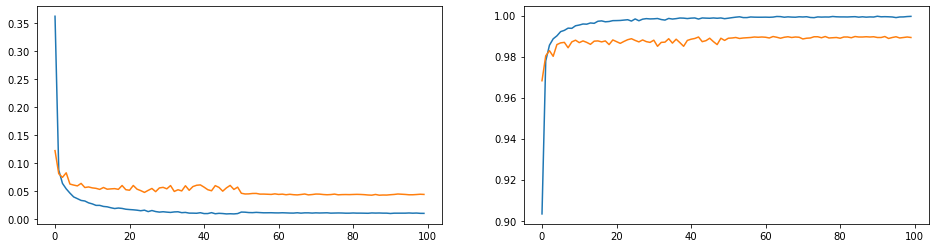

In [13]:
plt.figure(figsize=(16, 4))
plt.subplot(1,2,1)
plt.plot(history0.history['loss'] + history1.history['loss'], label='loss')
plt.plot(history0.history['val_loss'] + history1.history['val_loss'], label='val_loss')
plt.subplot(1,2,2)
plt.plot(history0.history['categorical_accuracy'] + history1.history['categorical_accuracy'], label='categorical_accuracy')
plt.plot(history0.history['val_categorical_accuracy'] + history1.history['val_categorical_accuracy'], label='val_categorical_accuracy')
plt.show()

In [14]:
model = load_model(filepath)

In [15]:
df = pd.read_csv('test.csv')
test = df.values

In [16]:
test = test.reshape(-1, 28, 28, 1)

In [17]:
predict = model.predict(test)
ans = np.argmax(predict, axis=1)

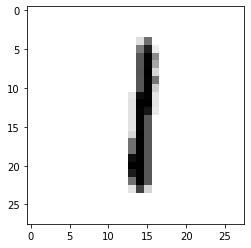

1


In [71]:
n=np.random.randint(test.shape[0])
plt.imshow(test[n], cmap = 'binary',)
plt.show()
print(ans[n])

In [19]:
ans = np.argmax(predict, axis=1)

In [20]:
result = pd.DataFrame(columns=['ImageId'], data=np.arange(1, len(ans)+1))

In [21]:
result['Label'] = ans
result

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [22]:
result.to_csv('submission.csv', index=False)